# DNN으로 보스턴 집값 예측

In [1]:
# 패키지 수입
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# 하이퍼 파라미터 지정
MY_HIDDEN = 1000 # 은닉층 뉴런 수
MY_EPOCH = 10 # 반복 학습 수

# 판다스 테이블 출력 시 생략하는 컬럼을 방지하는 옵션
# pd.set_option('display.max_columns', None)

In [3]:
# 데이터 파일 읽고 출력
data = pd.read_csv('housing.csv')

# 데이터 샘플 출력
display(data.head())
display(data.tail())

# 데이터 통계 출력
print(data.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

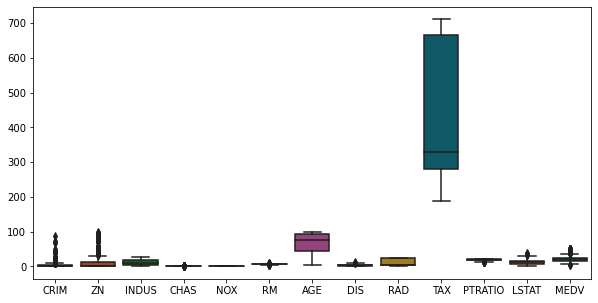

In [4]:
# 상자 그림

plt.figure(figsize=(10,5))
sns.boxplot(data=data, palette='dark')
plt.show()

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038 -1.0755623
   0.15968566]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415 -0.49243937
  -0.10152429]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415 -1.2087274
   1.32424667]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583 -0.98304761
   0.14880191]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583 -0.86530163
  -0.0579893 ]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583 -0.66905833
  -1.15724782]]
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
           0         1         2         3         4         5         6   \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577

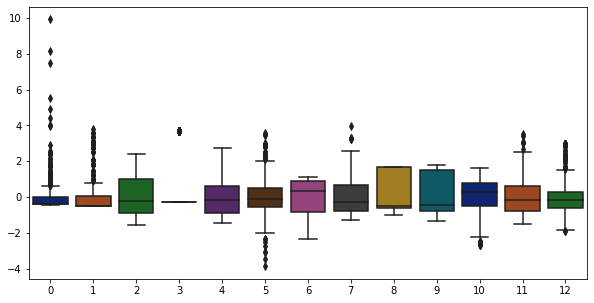

In [5]:
# 데이터 정규화
# z-점수 정규화는 결과가 numpy로 전환함
scaler = StandardScaler()
z_data = scaler.fit_transform(data)
print(z_data)
print(type(data))
print(type(z_data))

# # z-데이터를 numpy에서 pandas로 전환
z_data = pd.DataFrame(z_data)
print(z_data)

# z-점수 정규화 후 통계 출력
print(z_data.describe())

# 상자 그림

plt.figure(figsize=(10,5))
sns.boxplot(data=z_data, palette='dark')
plt.show()

In [6]:
# 데이터를 입력과 출력으로 분할
X_data = z_data.drop(12,axis=1)
Y_data = z_data[12]

# 데이터를 학습용과 평가용으로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    test_size=0.3,random_state=22,shuffle=True)
# display(X_train)
# display(X_test)
# display(Y_train)
# display(Y_test)
print("X_train 모양\t:",X_train.shape)
print("X_test 모양\t:",X_test.shape)
print("Y_train 모양\t:",Y_train.shape)
print("Y_test 모양\t:",Y_test.shape)

X_train 모양	: (354, 12)
X_test 모양	: (152, 12)
Y_train 모양	: (354,)
Y_test 모양	: (152,)


In [7]:
# 인공신경망 구현
model = Sequential() # 입력부터 출력으로 한층 한층 추가하는 방식

# 입력층 + 은닉층1 동시에 추가
model.add(Dense(units=MY_HIDDEN,
                input_dim=12,
                activation='relu'))

# 은닉층2 추가
model.add(Dense(units=MY_HIDDEN,
                activation='relu'))

# 출력층 추가
model.add(Dense(units=1))

# DNN(deep neural network) 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             130000    
                                                                 
 dense_1 (Dense)             (None, 10000)             100010000 
                                                                 
 dense_2 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 100,150,001
Trainable params: 100,150,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
# DNN 학습
# 학습 환경 설정
model.compile(optimizer='sgd',
              loss='mse')

# 학습 진행
print('학습 시작')
begin = time()

model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          verbose=1)

end = time()
print('총 학습 시간 :',end - begin)


학습 시작
Epoch 1/10
12/12 [==============================] - 4s 334ms/step - loss: 0.7072
Epoch 2/10
12/12 [==============================] - 4s 317ms/step - loss: 0.4519
Epoch 3/10
12/12 [==============================] - 4s 364ms/step - loss: 0.3500
Epoch 4/10
12/12 [==============================] - 4s 374ms/step - loss: 0.2955
Epoch 5/10
12/12 [==============================] - 4s 368ms/step - loss: 0.2542
Epoch 6/10
12/12 [==============================] - 4s 365ms/step - loss: 0.2270
Epoch 7/10
12/12 [==============================] - 4s 372ms/step - loss: 0.2089
Epoch 8/10
12/12 [==============================] - 4s 367ms/step - loss: 0.1969
Epoch 9/10
12/12 [==============================] - 5s 382ms/step - loss: 0.1869
Epoch 10/10
12/12 [==============================] - 4s 359ms/step - loss: 0.1780
총 학습 시간 : 43.51497459411621


In [9]:
# DNN 평가
score = model.evaluate(X_test,Y_test)

print('최종 MSE 손실값 : ',score)
# MY_EPOCH번 반복할 동안 평균적으로 0.19만큼 오차가 난다.

5/5 [==============================] - 0s 78ms/step - loss: 0.1873
최종 MSE 손실값 :  0.18730564415454865


In [10]:
# DNN 예측
pred = model.predict(X_test)
print("첫 번째 집값 예측 (z-점수): ",pred[0])
print("첫 번째 집값 정답 (z-점수): ",Y_test.iloc[0])



첫 번째 집값 예측 (z-점수):  [0.57937634]
첫 번째 집값 정답 (z-점수):  0.14880191096319792
